In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score



In [163]:
df = pd.read_csv("Movie_classification.csv")

In [164]:
df = df.drop("Time_taken",axis=1)

In [165]:
le = LabelEncoder()
df['3D_available'] = le.fit_transform(df['3D_available'])
df['Genre'] = le.fit_transform(df['Genre'])

In [166]:
X = df.drop('Critic_rating', axis=1)
y = df['Critic_rating']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
model = LinearRegression()

In [170]:
model.fit(X_train, y_train)

LinearRegression()

In [171]:
predictions = model.predict(X_test)

In [172]:
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, predictions)
print(f'R2 en entrenamiento: {r2_train}')
print(f'R2 en prueba: {r2_test}')

R2 en entrenamiento: 0.15914118457418713
R2 en prueba: 0.14990769178847807


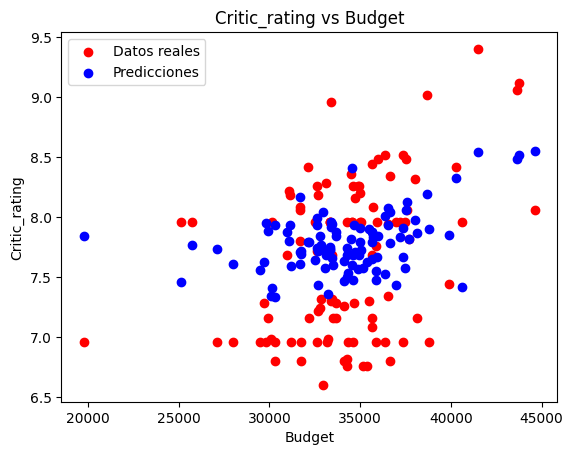

In [173]:
plt.scatter(X_test['Budget'], y_test, color = 'red', label='Datos reales')
plt.scatter(X_test['Budget'], predictions, color = 'blue', label='Predicciones')
plt.title('Critic_rating vs Budget')
plt.xlabel('Budget')
plt.ylabel('Critic_rating')
plt.legend()
plt.show()